In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Egg Production and Milk Production data

# Read Egg Production data
df_egg_production = pd.read_csv('/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 4/Egg_Production_2007_2012.csv')  

# Read Milk Production data
df_milk_production = pd.read_csv('/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 4/Milk_Production_2007_2012.csv')  

In [19]:
# Rename columns in Egg Production data
df_egg_production.columns = [col.replace('(In lakh nos.)', '').strip() for col in df_egg_production.columns]

# Melt the dataframes to reshape them
df_egg_production_reshaped = df_egg_production.melt(id_vars="States/Uts", var_name="Year", value_name="Egg Production")
df_milk_production_reshaped = df_milk_production.melt(id_vars="States/Uts", var_name="Year", value_name="Milk Production")

# Merge the reshaped dataframes
merged_df = pd.merge(df_egg_production_reshaped, df_milk_production_reshaped, on=["States/Uts", "Year"])

# Filter data for selected states and year
selected_states = ['Gujarat', 'Kerala', 'Andhra Pradesh', 'Uttar Pradesh', 'Punjab']
selected_year = '2007-08'
filtered_data = merged_df[(merged_df['States/Uts'].isin(selected_states)) & (merged_df['Year'] == selected_year)]

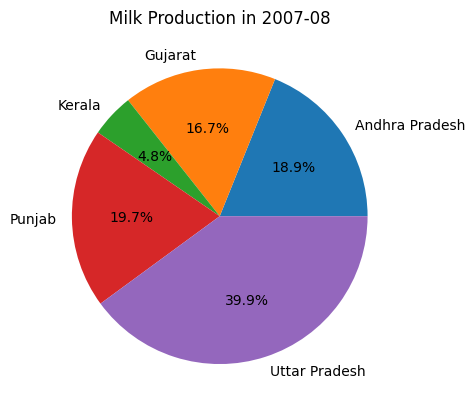

In [20]:
# Plot pie chart for Milk Production
plt.pie(filtered_data['Milk Production'], labels=filtered_data['States/Uts'], autopct='%1.1f%%')
plt.title(f'Milk Production in {selected_year}')
plt.show()

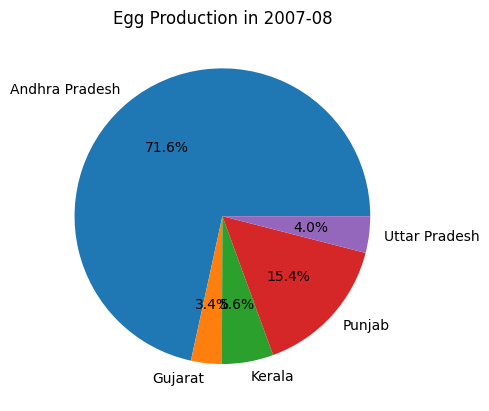

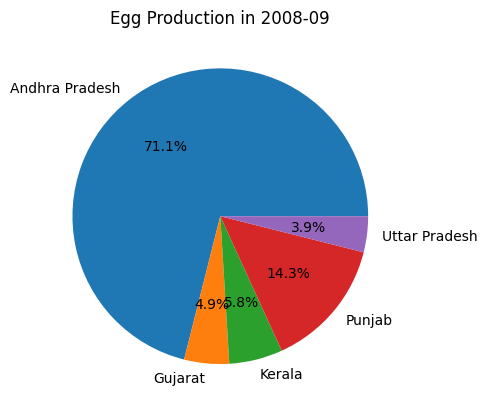

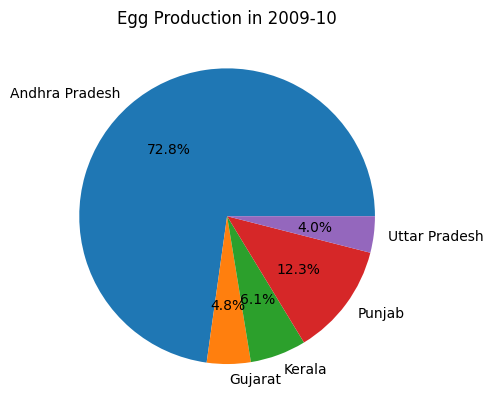

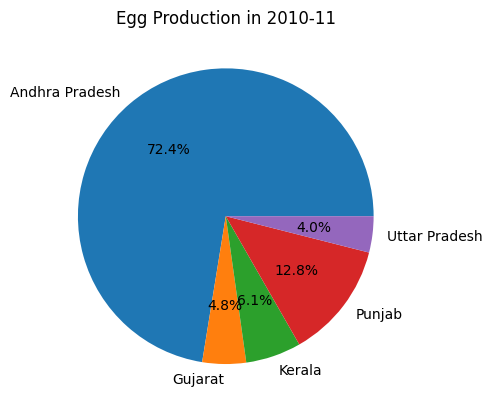

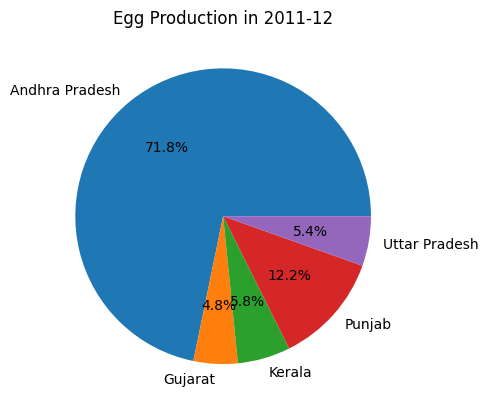

In [21]:
q2_data = df_egg_production[df_egg_production['States/Uts'].isin(idx)];
plt.pie(q2_data['2007-08'],labels=q2_data['States/Uts'], autopct='%1.1f%%')
plt.title('Egg Production in 2007-08')
plt.show()
plt.pie(q2_data['2008-09'],labels=q2_data['States/Uts'], autopct='%1.1f%%')
plt.title('Egg Production in 2008-09')
plt.show()
plt.pie(q2_data['2009-10'],labels=q2_data['States/Uts'], autopct='%1.1f%%')
plt.title('Egg Production in 2009-10')
plt.show()
plt.pie(q2_data['2010-11'],labels=q2_data['States/Uts'], autopct='%1.1f%%')
plt.title('Egg Production in 2010-11')
plt.show()
plt.pie(q2_data['2011-12'],labels=q2_data['States/Uts'], autopct='%1.1f%%')
plt.title('Egg Production in 2011-12')
plt.show()

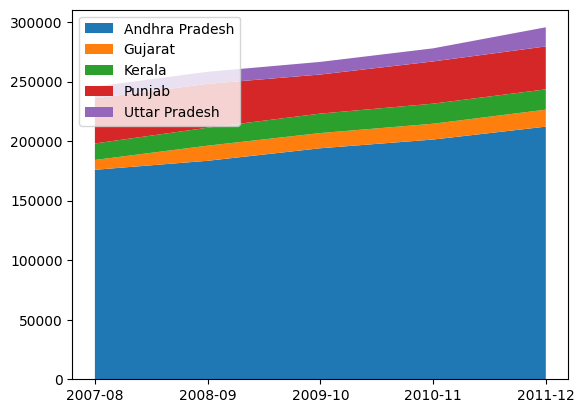

States/Uts     Year  Andhra Pradesh  Gujarat  Kerala  Punjab  Uttar Pradesh
Year                                                                       
0           2007-08          175884     8256   13831   37914           9814
1           2008-09          183446    12675   15095   36790          10140
2           2009-10          193958    12762   16330   32828          10596
3           2010-11          201277    13269   16856   35449          10991
4           2011-12          212103    14269   17049   36030          16075


In [22]:
data = {'States/Uts': ['Andhra Pradesh', 'Gujarat', 'Kerala', 'Punjab', 'Uttar Pradesh'],
        '2007-08': [175884, 8256, 13831, 37914, 9814],
        '2008-09': [183446, 12675, 15095, 36790, 10140],
        '2009-10': [193958, 12762, 16330, 32828, 10596],
        '2010-11': [201277, 13269, 16856, 35449, 10991],
        '2011-12': [212103, 14269, 17049, 36030, 16075]}
q2data = pd.DataFrame(data)


q2data_pivoted = q2data.melt(id_vars=['States/Uts'], var_name='Year', value_name='Production')

# Pivot the dataframe again to get desired format
q2data_pivoted = q2data_pivoted.pivot(index='Year', columns='States/Uts', values='Production')

q2data_pivoted.reset_index(inplace=True)
q2data_pivoted = q2data_pivoted.rename_axis('Year', axis='index')

plt.stackplot(q2data_pivoted['Year'], q2data_pivoted['Andhra Pradesh'], q2data_pivoted['Gujarat'], q2data_pivoted['Kerala'], q2data_pivoted['Punjab'], q2data_pivoted['Uttar Pradesh'], labels=q2data_pivoted.columns[1:])
plt.legend(loc='upper left')
plt.show()
print(q2data_pivoted)